In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Load Train Dataset
import pandas as pd

Final_Dataset_Provider_Train=pd.read_csv("/content/drive/MyDrive/bpm_fraud/new_data.csv",index_col=False)
Final_Dataset_Provider_Train.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
import pandas as pd
from sklearn.utils import shuffle

# Load the dataset
df = Final_Dataset_Provider_Train

# Calculate counts for each provider
provider_counts = df['Provider'].value_counts().reset_index()
provider_counts.columns = ['Provider', 'counts']

# Total dataset size
total_size = provider_counts['counts'].sum()

# Shuffle DataFrame
provider_counts = shuffle(provider_counts, random_state=42)

# Compute target sizes for train and test sets
train_target_size = 0.7 * total_size
current_train_size = 0

# Initialize train and test DataFrames
train_providers = []
test_providers = []

# Allocate providers to train and test sets ensuring no overlap
for index, row in provider_counts.iterrows():
    if current_train_size + row['counts'] <= train_target_size:
        train_providers.append(row['Provider'])
        current_train_size += row['counts']
    else:
        test_providers.append(row['Provider'])

# Create train and test DataFrames based on provider lists
train_df = df[df['Provider'].isin(train_providers)]
test_df = df[df['Provider'].isin(test_providers)]

print(f"Train set shape: {train_df.shape} entries")
print(f"Test set shape: {test_df.shape} entries")



Train set shape: (390747, 49) entries
Test set shape: (167464, 49) entries


In [6]:
x_train= train_df.drop(axis=1,columns=['PotentialFraud','Provider'])
y_train = train_df['PotentialFraud']

x_val= test_df.drop(axis=1,columns=['PotentialFraud','Provider'])
y_test = test_df['PotentialFraud']

In [4]:
# # Seperate dependent and independent variables
# x = Final_Dataset_Provider_Train.drop(axis=1,columns=['PotentialFraud'])
# y = Final_Dataset_Provider_Train['PotentialFraud']

In [5]:
# # # Standardize the data (train and test)
# # standard_scaler = StandardScaler()
# # standard_scaler.fit(x)
# # x_std = standard_scaler.transform(x)
# # #x_test_std = standard_scaler.transform(x_test)

# from sklearn.preprocessing import StandardScaler

# # Initialize StandardScaler
# standard_scaler = StandardScaler()

# # Fit and transform x
# x_std = standard_scaler.fit_transform(x)

# # x_std now contains the standardized features

In [7]:
# # Standardize the data (train and test)
# standard_scaler = StandardScaler()
# standard_scaler.fit(x)
# x_std = standard_scaler.transform(x)
# #x_test_std = standard_scaler.transform(x_test)

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit and transform x
x_std_train = standard_scaler.fit_transform(x_train)
X_test = standard_scaler.fit_transform(x_val)
# x_std now contains the standardized features

In [8]:
len(y_train)

390747

In [8]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV

# X_train, X_temp, y_train, y_temp = train_test_split(x_std, y, test_size=0.4, random_state=42)  # 60% training, 40% temp

# # Second split: Divide the temp set into validation and test sets
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splits temp into 50% validation, 50% test


# # Assuming X_train, X_val, X_test, y_train, y_val, y_test are predefined
# #X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3,random_state=42,stratify=y)

# # Reshape data
# X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
# X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# # Model definition
# model = Sequential([
#     LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
#     Dropout(0.2),
#     LSTM(50, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# # Model training
# history = model.fit(
#     X_train_reshaped, y_train,
#     epochs=1,
#     batch_size=32,
#     validation_data=(X_val_reshaped, y_val),
#     callbacks=[early_stopping, model_checkpoint]
# )

# # Model evaluation
# test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=1)
# print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")




# import matplotlib.pyplot as plt

# # Extracting accuracy history for plotting
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# epochs = range(1, len(train_acc) + 1)

# # Plotting training and validation accuracy
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.ylim(0.4, 0.8)
# plt.show()


Epoch 1/10
8548/8548 [==============================] - 350s 41ms/step - loss: 0.6592 - accuracy: 0.6296 - val_loss: 0.6586 - val_accuracy: 0.6295
Epoch 2/10
8548/8548 [==============================] - 345s 40ms/step - loss: 0.6586 - accuracy: 0.6296 - val_loss: 0.6585 - val_accuracy: 0.6295
Epoch 3/10
8548/8548 [==============================] - 349s 41ms/step - loss: 0.6585 - accuracy: 0.6296 - val_loss: 0.6585 - val_accuracy: 0.6295
Epoch 4/10
8548/8548 [==============================] - 366s 43ms/step - loss: 0.6583 - accuracy: 0.6295 - val_loss: 0.6583 - val_accuracy: 0.6295
Epoch 5/10
8548/8548 [==============================] - 370s 43ms/step - loss: 0.6581 - accuracy: 0.6296 - val_loss: 0.6582 - val_accuracy: 0.6295
Epoch 6/10
8548/8548 [==============================] - 359s 42ms/step - loss: 0.6579 - accuracy: 0.6296 - val_loss: 0.6581 - val_accuracy: 0.6295
Epoch 7/10
8548/8548 [==============================] - 353s 41ms/step - loss: 0.6577 - accuracy: 0.6296 - val_loss: 0

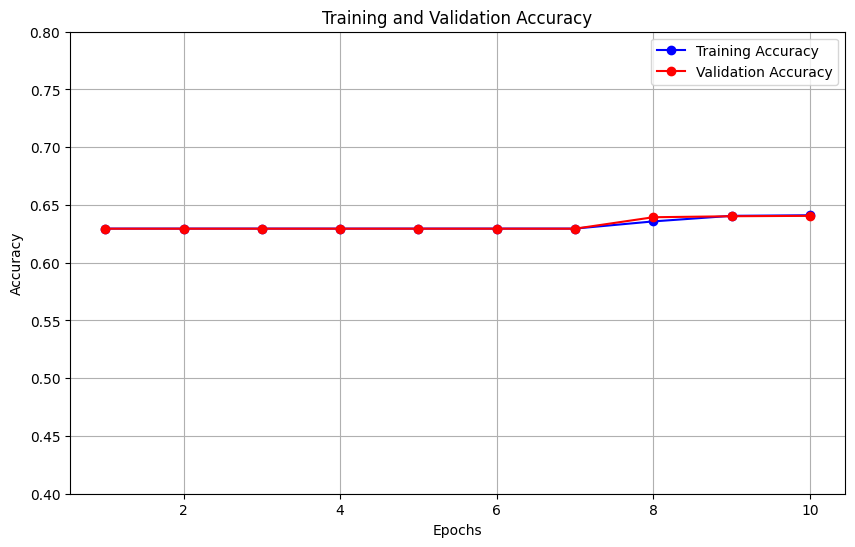

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(x_std_train, y_train, test_size=0.3, random_state=42)  # 60% training, 40% temp

# Second split: Divide the temp set into validation and test sets
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splits temp into 50% validation, 50% test


# Assuming X_train, X_val, X_test, y_train, y_val, y_test are predefined
#X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3,random_state=42,stratify=y)

# Reshape data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Model training
history = model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")




import matplotlib.pyplot as plt

# Extracting accuracy history for plotting
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0.4, 0.8)
plt.show()


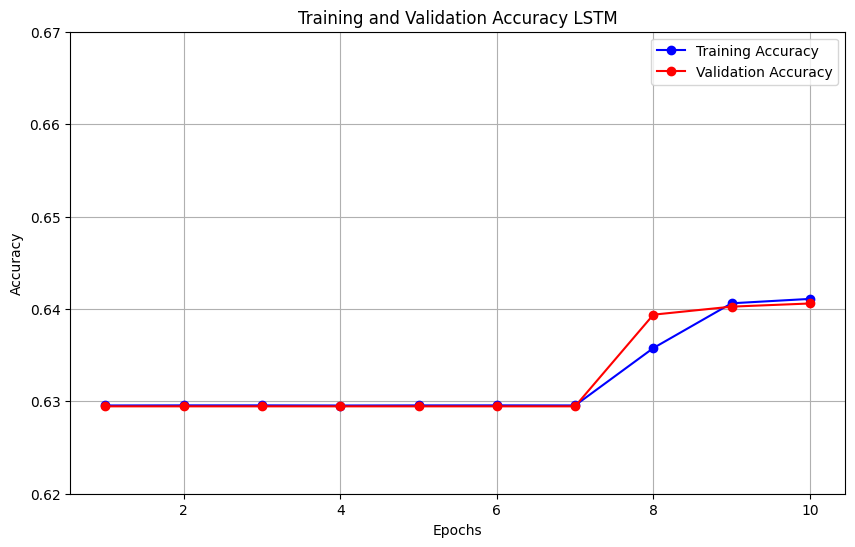

In [28]:

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0.62, 0.67)
plt.show()

Epoch 1/50
1069/1069 [==============================] - 6s 5ms/step - loss: -0.0533 - val_loss: -1.2864
Epoch 2/50
1069/1069 [==============================] - 5s 5ms/step - loss: -3.3278 - val_loss: -5.7248
Epoch 3/50
1069/1069 [==============================] - 3s 3ms/step - loss: -8.6834 - val_loss: -11.9988
Epoch 4/50
1069/1069 [==============================] - 3s 3ms/step - loss: -15.7555 - val_loss: -19.8912
Epoch 5/50
1069/1069 [==============================] - 4s 4ms/step - loss: -24.3968 - val_loss: -29.3184
Epoch 6/50
1069/1069 [==============================] - 4s 4ms/step - loss: -34.5402 - val_loss: -40.2148
Epoch 7/50
1069/1069 [==============================] - 4s 3ms/step - loss: -46.1046 - val_loss: -52.5066
Epoch 8/50
1069/1069 [==============================] - 4s 3ms/step - loss: -59.0226 - val_loss: -66.1625
Epoch 9/50
1069/1069 [==============================] - 5s 5ms/step - loss: -73.3074 - val_loss: -81.1750
Epoch 10/50
1069/1069 [============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4274/4274 [==============================] - 27s 6ms/step - loss: 0.6552 - accuracy: 0.6314 - val_loss: 0.6558 - val_accuracy: 0.6295
Epoch 3/50
4274/4274 [==============================] - 23s 5ms/step - loss: 0.6555 - accuracy: 0.6300 - val_loss: 0.6544 - val_accuracy: 0.6382
Epoch 4/50
4274/4274 [==============================] - 26s 6ms/step - loss: 0.6555 - accuracy: 0.6306 - val_loss: 0.6548 - val_accuracy: 0.6295
Epoch 5/50
4274/4274 [==============================] - 23s 5ms/step - loss: 0.6550 - accuracy: 0.6322 - val_loss: 0.6550 - val_accuracy: 0.6340
Epoch 6/50
4274/4274 [==============================] - 20s 5ms/step - loss: 0.6552 - accuracy: 0.6324 - val_loss: 0.6558 - val_accuracy: 0.6295
Epoch 7/50
4274/4274 [==============================] - 21s 5ms/step - loss: 0.6553 - accuracy: 0.6304 - val_loss: 0.6552 - val_accuracy: 0.6295
Epoch 8/50
4274/4274 [==============================] - 19s 4ms/step - loss: 0.6559 - accuracy: 0.6316 - val_loss: 0.6564 - val_accuracy: 0.6

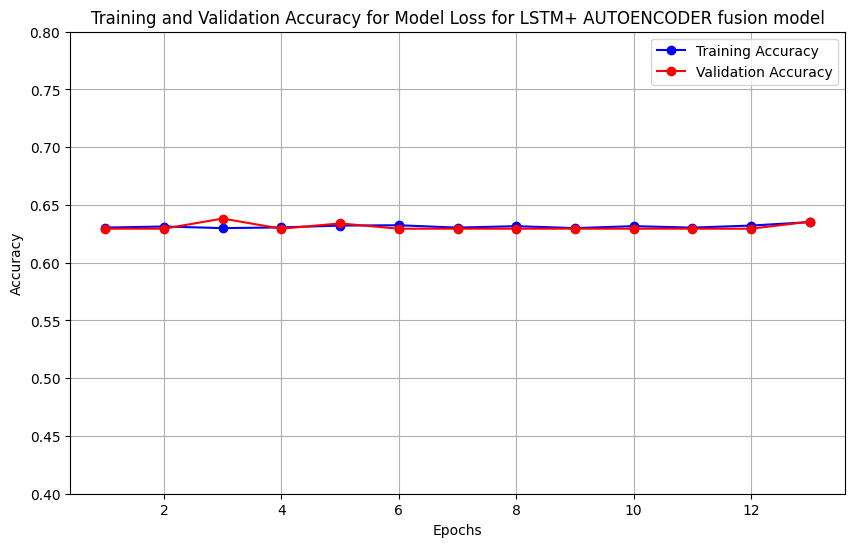

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt



# Splitting the dataset into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(x_std, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(x_std_train, y_train, test_size=0.3, random_state=42)  # 60% training, 40% temp

# Autoencoder configuration
feature_dim = X_train.shape[1]
encoding_dim = 1  # This needs to be chosen based on the desired compression level

# Autoencoder model
input_layer = Input(shape=(feature_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(feature_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val, X_val))

# Encode the datasets
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Calculate the number of sequences based on the encoded feature size
n_sequences = X_train_encoded.shape[0]  # Assuming each sample is treated as a sequence

# Reshape encoded data for LSTM input
X_train_encoded_reshaped = X_train_encoded.reshape((n_sequences, 1, encoding_dim))
X_val_encoded_reshaped = X_val_encoded.reshape((X_val_encoded.shape[0], 1, encoding_dim))
X_test_encoded_reshaped = X_test_encoded.reshape((X_test_encoded.shape[0], 1, encoding_dim))

# LSTM model using encoded input
lstm_input = Input(shape=(1, encoding_dim))  # Adjusted to match the reshaped input
lstm_out = LSTM(50)(lstm_input)
output_layer = Dense(1, activation='sigmoid')(lstm_out)

fusion_model = Model(inputs=lstm_input, outputs=output_layer)
fusion_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_fusion_model.h5', monitor='val_loss', save_best_only=True)

# Train the fusion model
history = fusion_model.fit(X_train_encoded_reshaped, y_train, epochs=50, batch_size=64,
                           validation_data=(X_val_encoded_reshaped, y_val), callbacks=[early_stopping, model_checkpoint])

# Model evaluation
test_loss, test_accuracy = fusion_model.evaluate(X_test_encoded_reshaped, y_test, verbose=1)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model Loss for LSTM+ AUTOENCODER fusion model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0.4, 0.8)
plt.show()

# # Plotting training history
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss For LSTM+ AUTOENCODER fusion model')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')  # Label for the x-axis
# plt.legend()  # Adds a legend to distinguish the lines
# plt.show()  # Displays the plot

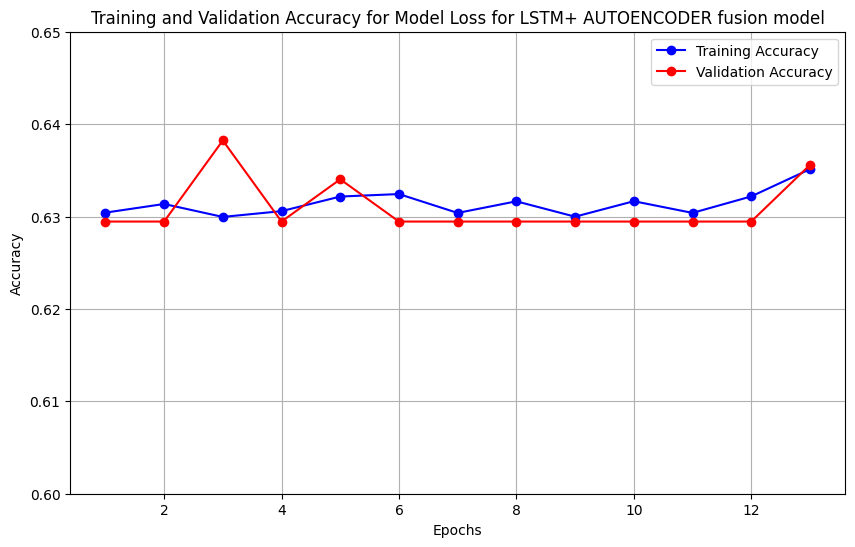

In [7]:

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model Loss for LSTM+ AUTOENCODER fusion model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0.60, 0.65)
plt.show()

Epoch 1/10
1832/1832 [==============================] - 33s 17ms/step - loss: 0.6854 - accuracy: 0.5221 - val_loss: 0.7322 - val_accuracy: 0.4278
Epoch 2/10
1832/1832 [==============================] - 26s 14ms/step - loss: 0.6847 - accuracy: 0.5244 - val_loss: 0.7156 - val_accuracy: 0.4634
Epoch 3/10
1832/1832 [==============================] - 31s 17ms/step - loss: 0.6844 - accuracy: 0.5277 - val_loss: 0.7289 - val_accuracy: 0.3052
Epoch 4/10
1832/1832 [==============================] - 27s 15ms/step - loss: 0.6842 - accuracy: 0.5309 - val_loss: 0.7063 - val_accuracy: 0.5611
Epoch 5/10
1832/1832 [==============================] - 27s 15ms/step - loss: 0.6838 - accuracy: 0.5321 - val_loss: 0.7310 - val_accuracy: 0.4070
Epoch 6/10
1832/1832 [==============================] - 31s 17ms/step - loss: 0.6835 - accuracy: 0.5351 - val_loss: 0.7311 - val_accuracy: 0.3902
Epoch 7/10
1832/1832 [==============================] - 27s 15ms/step - loss: 0.6832 - accuracy: 0.5380 - val_loss: 0.7292 -

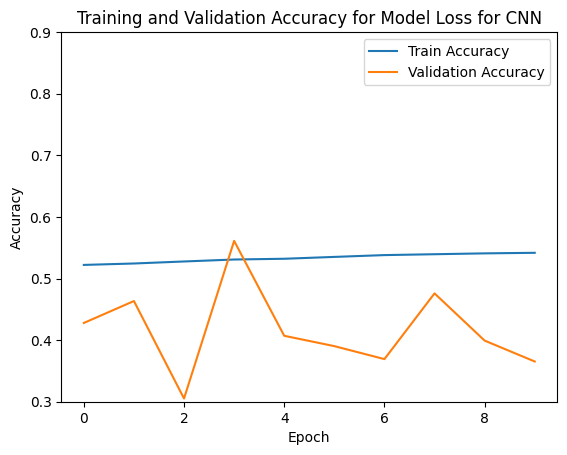

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, SimpleRNN, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





# Reshaping x for CNN and RNN
x_train_reshaped = x_std_train.reshape((x_std_train.shape[0], x_std_train.shape[1], 1))

x_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Splitting the data
#x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.2, random_state=42)

# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_std_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the CNN Model
history_cnn = cnn_model.fit(x_std_train, y_train, epochs=10, batch_size=128, validation_split=0.4, verbose=1)

# Evaluating the CNN Model
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test_reshaped, y_test)
print(f'CNN Model - Test Loss: {loss_cnn}, Test Accuracy: {accuracy_cnn}')

# Plotting Training History for CNN
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model Loss for CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.3, 0.9)
plt.legend()
plt.show()



In [12]:
len(x_std_train)

390747

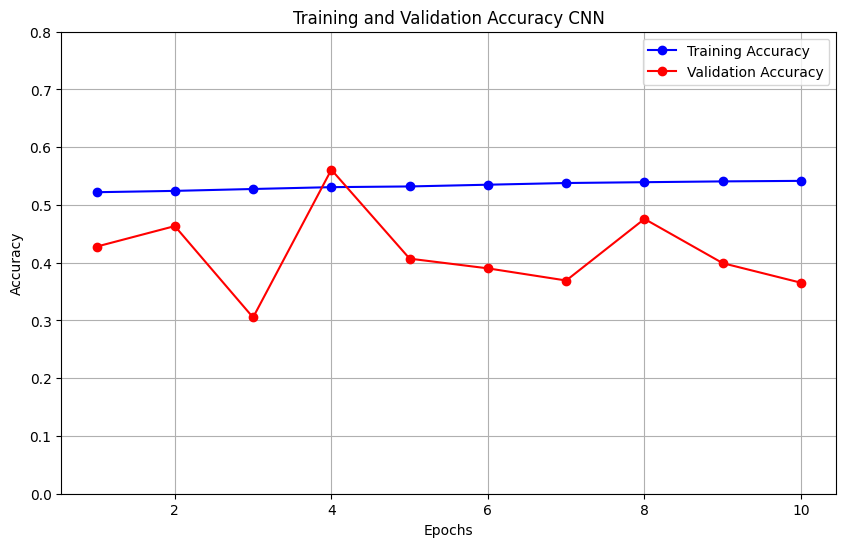

In [16]:
# Plotting training and validation accuracy

train_acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.8)
plt.show()

In [12]:
# # Plotting Training History for CNN
# plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
# plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy for Model Loss for CNN')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim(0.6,0.8)
# plt.legend()
# plt.show()


Epoch 1/10
1832/1832 [==============================] - 90s 48ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.7288 - val_accuracy: 0.1941
Epoch 2/10
1832/1832 [==============================] - 97s 53ms/step - loss: 0.6916 - accuracy: 0.5204 - val_loss: 0.7345 - val_accuracy: 0.2062
Epoch 3/10
1832/1832 [==============================] - 85s 46ms/step - loss: 0.6895 - accuracy: 0.5190 - val_loss: 0.7484 - val_accuracy: 0.1406
Epoch 4/10
1832/1832 [==============================] - 89s 48ms/step - loss: 0.6878 - accuracy: 0.5232 - val_loss: 0.7281 - val_accuracy: 0.1412
Epoch 5/10
1832/1832 [==============================] - 83s 46ms/step - loss: 0.6878 - accuracy: 0.5231 - val_loss: 0.7308 - val_accuracy: 0.1406
Epoch 6/10
1832/1832 [==============================] - 88s 48ms/step - loss: 0.6883 - accuracy: 0.5232 - val_loss: 0.7072 - val_accuracy: 0.1406
Epoch 7/10
1832/1832 [==============================] - 89s 48ms/step - loss: 0.6872 - accuracy: 0.5221 - val_loss: 0.7183 -

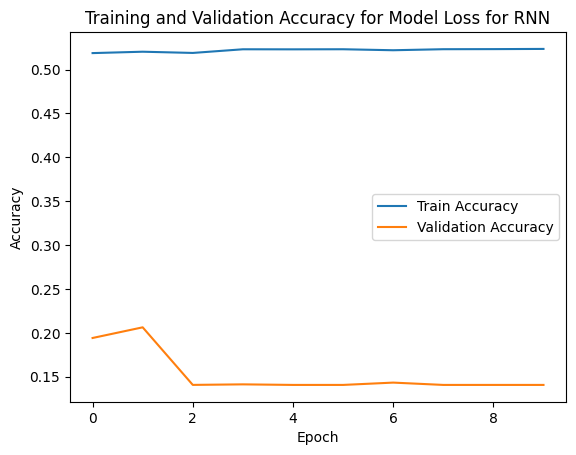

In [11]:
# RNN Model

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, SimpleRNN, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

rnn_model = Sequential([
    SimpleRNN(50, input_shape=(x_std_train.shape[1], 1), return_sequences=True),
    SimpleRNN(50),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the RNN Model
history_rnn = rnn_model.fit(x_std_train, y_train, epochs=10, batch_size=128, validation_split=0.4, verbose=1)

# Evaluating the RNN Model
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test, y_test)
print(f'RNN Model - Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}')

# Plotting Training History for RNN
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model Loss for RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


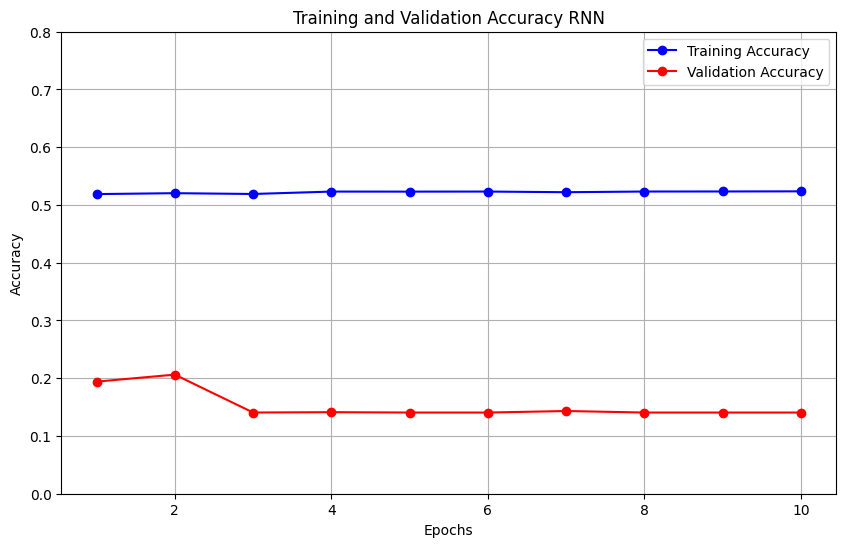

In [14]:
# Plotting training and validation accuracy

train_acc = history_rnn.history['accuracy']
val_acc = history_rnn.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0,0.8)
plt.show()

In [ ]:
# Plotting Training History for RNN
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model Loss for RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.4,0.8)
plt.legend()
plt.show()
